# Word2Vec

In [27]:
import numpy as np
import pandas as pd
import gensim
import os

In [28]:
!pip install --upgrade gensim --user

In [29]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
import os
from nltk.tokenize import sent_tokenize  
data_path = '/kaggle/input/game-of-thrones-books/'


story = []


for filename in os.listdir(os.path.join(data_path)):
  file_path = os.path.join(data_path, filename)
  
  
  if os.path.isfile(file_path):
    with open(file_path, 'r', encoding='latin-1') as f:
      corpus = f.read()
      raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [ ]:
story

In [31]:
len(story)

145018

In [ ]:
story

In [32]:
story[0]

['version',
 'history',
 'reedited',
 'by',
 'maelstrom',
 'feast',
 'for',
 'crows',
 'book',
 'four',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'george']

In [34]:
model = gensim.models.Word2Vec(

    window=10,

    min_count=2

)

In [35]:
model.build_vocab(story)

In [36]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6568526, 8628190)

In [37]:
model.wv.most_similar('daenerys')

[('targaryen', 0.8144660592079163),
 ('princess', 0.7376178503036499),
 ('myrcella', 0.7359738349914551),
 ('stormborn', 0.732984721660614),
 ('elia', 0.7244689464569092),
 ('margaery', 0.6816333532333374),
 ('dorne', 0.6773988604545593),
 ('rhaegar', 0.6763017773628235),
 ('queen', 0.6653938889503479),
 ('viserys', 0.6604251265525818)]

In [38]:
model.wv.similarity('arya','sansa')

0.8478105

In [39]:
model.wv['deep'].shape

(100,)

In [40]:
vec = model.wv.get_normed_vectors()

In [41]:
vec

array([[-0.19154596, -0.06881212,  0.02384339, ..., -0.20505227,
        -0.01335848,  0.05447876],
       [-0.10739253, -0.0660179 , -0.03752626, ..., -0.00301852,
        -0.05605856,  0.20597807],
       [ 0.19857721, -0.04412691, -0.14596179, ...,  0.00648689,
         0.15297842, -0.17438847],
       ...,
       [-0.05623245,  0.09286114, -0.0268476 , ..., -0.09703758,
         0.15344653,  0.01454238],
       [ 0.05832887,  0.03367861, -0.1432487 , ...,  0.16775857,
        -0.02160829,  0.08853241],
       [-0.03098132, -0.02951664,  0.01031025, ..., -0.07131436,
        -0.01891521,  0.05420822]], dtype=float32)

In [42]:
model.wv.get_normed_vectors().shape

(17453, 100)

In [43]:
y = model.wv.index_to_key

In [44]:
len(y)

17453

In [45]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'know',
 'see',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'face',
 'still',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=3)

In [48]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [49]:
X

array([[-0.1655875 ,  0.5944782 , -0.05515537],
       [-0.17485602,  0.3526255 ,  0.01501047],
       [ 0.28819007,  0.5771773 ,  0.18321957],
       ...,
       [-0.07963444, -0.22746827, -0.16661459],
       [-0.00976728,  0.2491957 , -0.11134423],
       [ 0.09918401, -0.1176355 , -0.35182634]], dtype=float32)

In [50]:
X.shape

(17453, 3)

In [55]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

In [ ]:
pip install -U kaleido

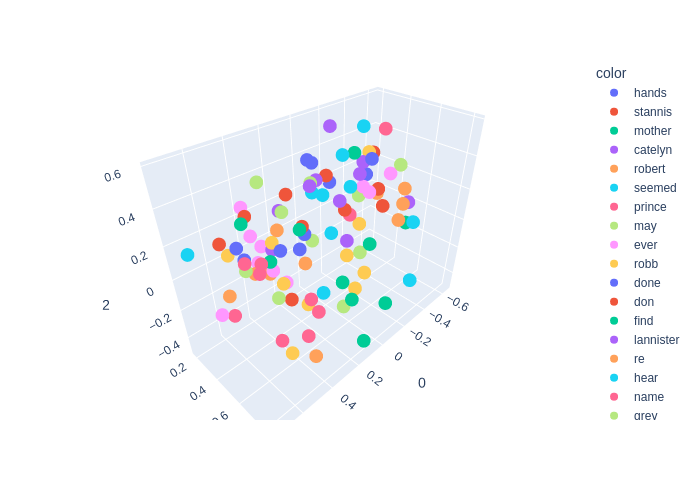

In [54]:
import plotly.express as px
import io
from PIL import Image

fig = px.scatter_3d(X[200:300], x=0, y=1, z=2, color=y[200:300])

img_buf = io.BytesIO()
fig.write_image(img_buf, format='png')
img_buf.seek(0)

from IPython.display import display
display(Image.open(img_buf))